In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Transformacion variables para conseguir una relacion no lineal

- La variable a predecir no necesariamente tiene una relacion lineal con las variables predictoras
- Pueden haber relaciones no lineales
- Recomendar hacer un plot con las variables predictores
-

In [41]:
data = pd.read_csv('https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/auto/auto-mpg.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


- Hago los cambios siguiendo las instrucciones del instructor, sin una posicion critica, o proponer una mejor manera, con la finalidad de obtener los mismos resultados a la hora de seguir el curso. Lo mas importante es entender el **concepto**

In [42]:
data['mpg'] = data['mpg'].dropna()
data['horsepower'] = data['horsepower'].dropna()

Text(0.5, 1.0, 'CV vs MPG')

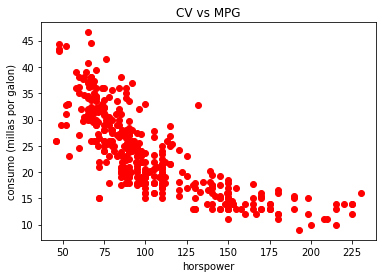

In [43]:
# La distribucion de los datos, parece tener una forma exponencial o cuadratica en forma de parabola
plt.plot(data["horsepower"], data["mpg"], 'ro')
plt.xlabel("horspower")
plt.ylabel("consumo (millas por galon)")
plt.title("CV vs MPG")

### Modelo de regresión lineal
mpg = w0+w1horsepower

In [44]:
X = data['horsepower'].fillna(data['horsepower'].mean())
y = data['mpg'].fillna(data['mpg'].mean())

In [45]:
type(X)

pandas.core.series.Series

In [46]:
X = np.array(X)
X_data = X[:, np.newaxis]

In [47]:
lm = LinearRegression()

lm.fit(X_data,y)

LinearRegression()

In [48]:
type(X)

numpy.ndarray

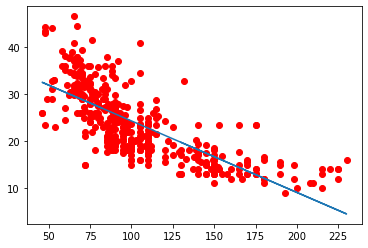

In [49]:
plt.plot(X,y,"ro")
plt.plot(X, lm.predict(X_data))

- Parece que la linea se ajusta medianamente a los datos

In [51]:
R2 = lm.score(X_data,y)
R2

0.574653340645025

In [57]:
#Suma de los cuadrados de las desviaciones
SSD = np.sum((y - lm.predict(X_data))**2)
#Factor RSE
RSE = np.sqrt(SSD/len(X_data)-1)
y_mean = np.mean(y)
error = RSE/y_mean

In [58]:
SSD, RSE, y_mean, error*100

(10315.75196006092, 4.940471238582748, 23.51457286432162, 21.010252948625173)

### Modelo de regresion cuadratico
- **mpg = w0+w1horsepower^2**

In [59]:
X_data = X**2
X_data = X_data[:,np.newaxis]

In [60]:
lm = LinearRegression()
lm.fit(X_data, y)

LinearRegression()

In [61]:
# Empeoro
lm.score(X_data,y)

0.4849887034823205

In [62]:
#Suma de los cuadrados de las desviaciones
SSD = np.sum((y - lm.predict(X_data))**2)
#Factor RSE
RSE = np.sqrt(SSD/len(X_data)-1)
y_mean = np.mean(y)
error = RSE/y_mean

In [65]:
# El error aumento, el 23.20125% no pudo ser explicado por el modelo
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.455676832957554, 23.51457286432162, 23.20125848951901)

### Modelo de regresión lineal y cuadratico
- **mpg = a + b * horsepower + c * horsepower^2**

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [70]:
# Usaremos un polinomio de grado dos
# Instancia estimador
poly = PolynomialFeatures(degree = 2)

In [72]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [75]:
lm = linear_model.LinearRegression()
lm.fit(X_data, y)

LinearRegression()

In [76]:
lm.score(X_data, y)

0.6439066584257469